In [117]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
data = pd.read_excel(r"C:\Users\milan\OneDrive\Documenti\difensori_2020.xlsx")
data

,Player,Nation,Pos,Squad,Age,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Clr,Err,MP,Starts,90s,Gls,Ast,CrdY,CrdR,xG,PrgC,PrgP,PrgR,Gls.1,Ast.1,xG.1,Cmp,Att.1,Cmp%,TotDist,PrgDist,short Cmp,short Att,short Cmp%,medium Cmp,medium Att,medium Cmp%,long Cmp,long Att,long Cmp%,Ast.2,xA,KP,2024-03-01 00:00:00,PPA,CrsPA,PrgP.1,Touches,Def Pen,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Att Pen,Fls,Fld,Int.1,TklW.1,PKcon,OG,Recov,AerWon,Aer Lost,Aer Won%,CrdY + CrdR,AerTot
0,Danilo,br BRA,"DF,MF",Juventus,29,62,31,37,16,9,35,66,53.0,31,32,12,20,66,68,2,34,32,32.4,1,4,6,0,1.9,59,240,55,0.03,0.12,0.06,2184,2479,88.1,39579,12379,873,937,93.2,1094,1196,91.5,191,271,70.5,4,3.0,25,220,35,14,240,2744,148,843,1565,364,23,25,20,66,31,0,0,213,30,20,60.0,NaN,50
1,Simone Edera,it ITA,"DF,MF",Torino,23,3,1,2,1,0,3,4,75.0,1,0,0,0,1,1,0,2,0,0.6,0,0,0,0,0.1,1,1,2,0.00,0.00,0.25,17,22,77.3,331,82,8,10,80.0,6,6,100.0,3,4,75.0,0,0.2,3,1,0,0,1,34,2,9,14,11,0,1,1,1,1,0,0,3,0,0,NaN,0.0,0
2,Gianluca Frabotta,it ITA,"DF,MF",Juventus,21,7,4,5,0,2,5,12,41.7,7,9,1,8,14,15,0,15,8,7.7,0,1,5,0,0.2,14,32,65,0.00,0.13,0.03,400,477,83.9,6225,1883,209,228,91.7,160,180,88.9,19,39,48.7,1,0.6,4,25,6,3,32,544,18,150,242,155,15,12,2,14,4,0,0,43,12,14,46.2,5.0,26
3,Paolo Ghiglione,it ITA,"DF,MF",Genoa,23,27,15,17,8,2,13,28,46.4,15,14,2,12,13,25,0,23,14,15.1,0,4,4,0,0.5,39,27,99,0.00,0.27,0.04,401,609,65.8,6829,2366,197,234,84.2,147,218,67.4,47,107,43.9,4,1.7,18,14,21,18,27,763,40,220,290,263,18,18,13,13,15,0,0,60,15,18,45.5,4.0,33
4,Riccardo Improta,it ITA,"DF,MF",Benevento,26,39,23,25,8,6,21,45,46.7,24,23,4,19,28,47,0,34,23,25.9,1,0,7,0,2.0,58,81,139,0.04,0.00,0.08,658,936,70.3,10025,4208,362,428,84.6,213,291,73.2,51,116,44.0,0,2.6,21,66,33,18,81,1205,70,297,499,423,53,23,55,28,23,0,1,121,49,49,50.0,7.0,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Vasilios Zagaritis,gr GRE,DF,Parma,19,0,0,0,0,0,0,0,NaN,0,1,0,1,0,0,0,2,0,0.7,0,0,0,0,0.0,2,5,11,0.00,0.00,0.00,41,50,82.0,528,198,31,32,96.9,9,11,81.8,1,4,25.0,0,0.1,1,3,1,0,5,57,0,10,23,24,1,0,1,0,0,0,0,4,0,0,NaN,0.0,0
224,Cristián Zapata,co COL,DF,Genoa,33,18,12,11,7,0,10,14,71.4,4,15,11,4,15,56,0,12,12,10.8,0,0,2,0,0.2,2,10,1,0.00,0.00,0.02,429,494,86.8,8240,2552,137,153,89.5,240,255,94.1,45,67,67.2,0,0.0,1,6,1,0,10,607,114,368,229,13,5,6,5,15,12,1,0,45,27,13,67.5,2.0,40
225,Gabriele Zappa,it ITA,DF,Cagliari,20,34,17,16,15,3,22,49,44.9,27,36,4,32,24,50,0,34,27,26.6,0,4,3,0,0.6,49,108,141,0.00,0.15,0.02,1003,1313,76.4,15015,6281,563,642,87.7,360,465,77.4,52,132,39.4,4,3.2,28,69,36,14,108,1550,76,452,605,507,41,25,11,24,17,0,0,126,10,24,29.4,3.0,34
226,Davide Zappacosta,it ITA,DF,Genoa,28,33,16,15,13,5,15,30,50.0,15,17,1,16,18,41,0,25,23,22.7,4,2,3,0,2.6,88,38,166,0.18,0.09,0.11,859,1090,78.8,12506,3644,500,551,90.7,278,345,80.6,43,94,45.7,2,1.0,12,25,17,9,38,1375,59,337,524,529,67,23,19,18,16,0,0,119,14,11,56.0,3.0,25


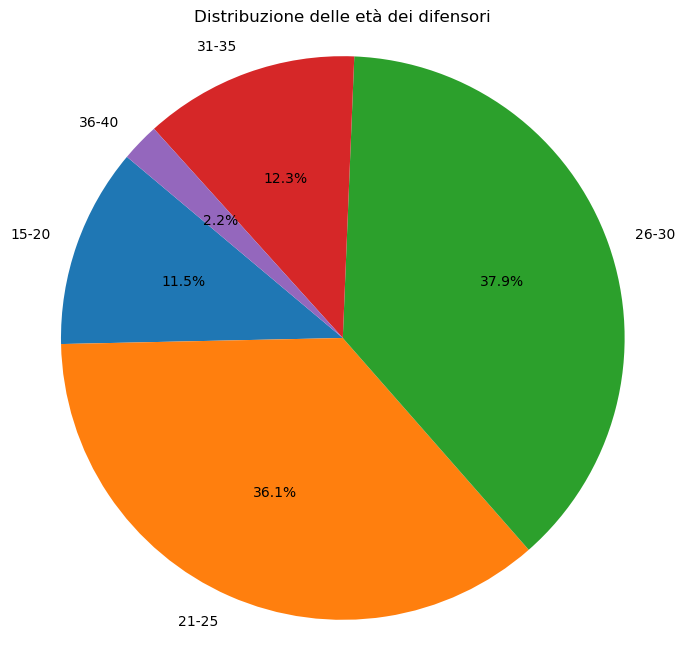

In [80]:
#diagramma a torta




# Estrai le età dalla quinta colonna (indice 4, perché l'indicizzazione parte da 0)
eta = data['Age']

# Definisci le fasce di età
bins = [15, 20, 25, 30, 35, 40]
labels = ['15-20', '21-25', '26-30', '31-35', '36-40']

# Categorizza le età nelle fasce specificate
eta_bins = pd.cut(eta, bins=bins, labels=labels, right=True, include_lowest=True)

# Conta il numero di difensori in ciascuna fascia
eta_counts = eta_bins.value_counts().sort_index()

# Crea il diagramma a torta
plt.figure(figsize=(8, 8))
plt.pie(eta_counts, labels=eta_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione delle età dei difensori')
plt.axis('equal')  # Per rendere il diagramma a torta circolare



# Aggiungi la legenda
ax.legend([f"{label} - {int(count)} ({pct:.1f}%)" for label, count, pct in zip(eta_counts.index, eta_counts, 100*eta_counts/eta_counts.sum())], title="Fasce d'età", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Mostra il diagramma a torta
plt.show()


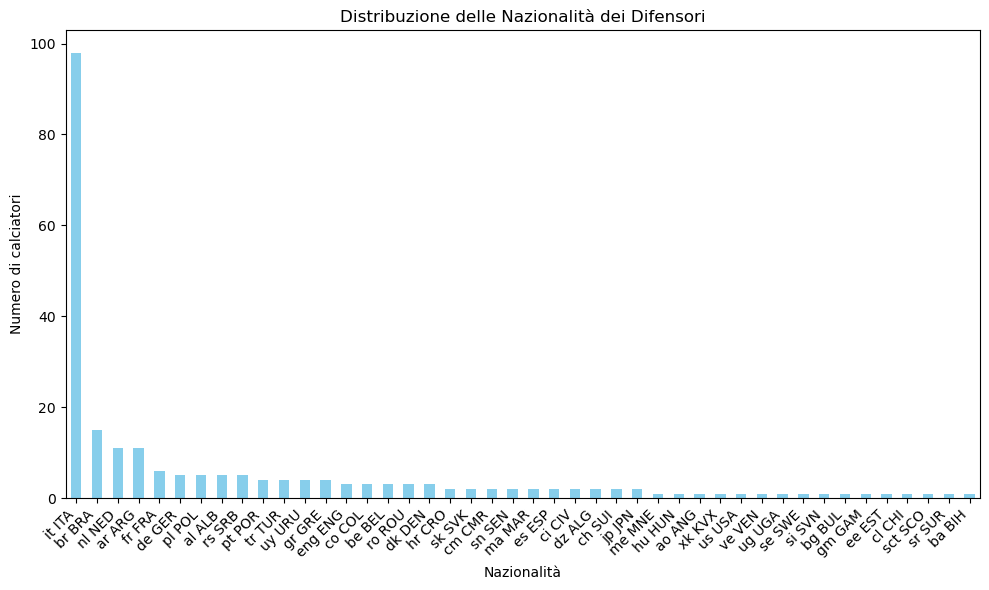

In [81]:
#istogramma nazionalità
nazionalita = data['Nation']

# Conta il numero di calciatori per ciascuna nazionalità
nazionalita_counts = nazionalita.value_counts()

# Crea l'istogramma
fig, ax = plt.subplots(figsize=(10, 6))
nazionalita_counts.plot(kind='bar', ax=ax, color='skyblue')

# Aggiungi i titoli e le etichette
ax.set_title('Distribuzione delle Nazionalità dei Difensori')
ax.set_xlabel('Nazionalità')
ax.set_ylabel('Numero di calciatori')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45, ha='right')

# Mostra il grafico
plt.tight_layout()
plt.show()

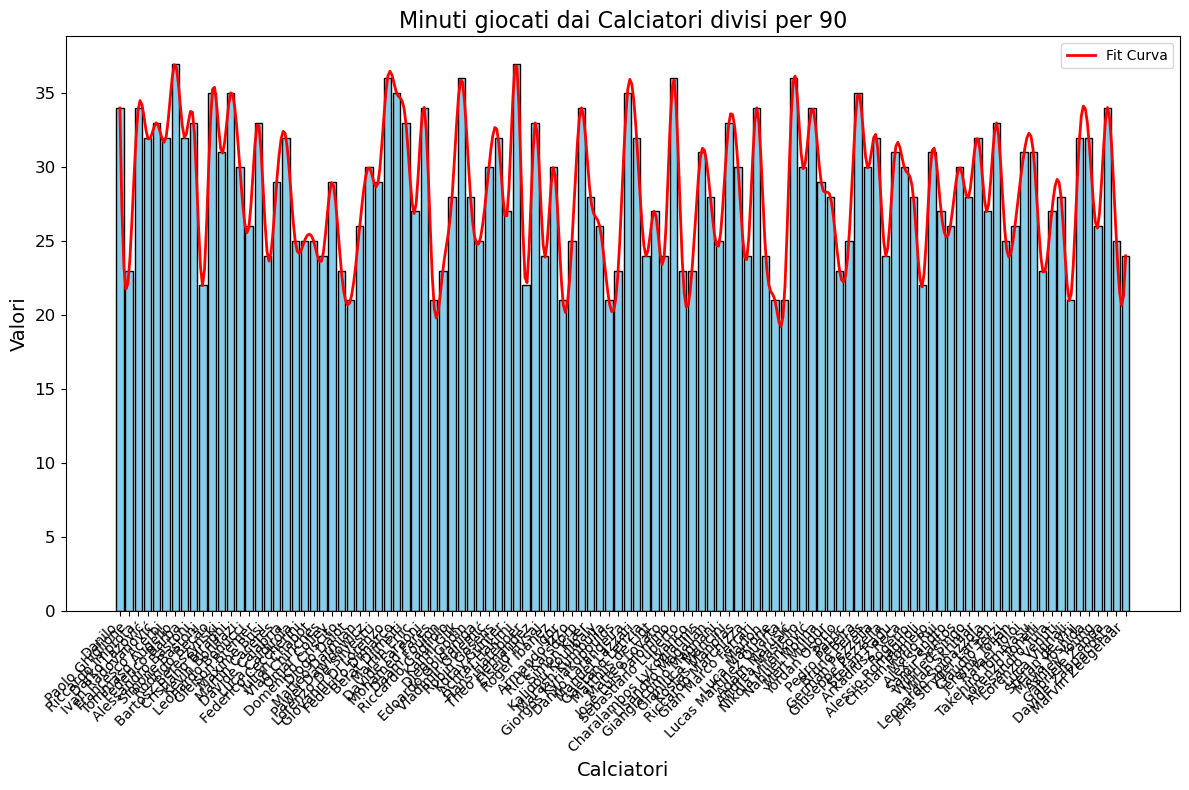

La media risulta: 28.490909090909092


In [82]:
import numpy as np
from scipy.interpolate import make_interp_spline

# Estrai i dati rilevanti (calciatori e valori nella settima colonna)
calciatori = data['Player']  # Assume che i nomi dei calciatori siano nella prima colonna
valori = data['MP']      # Settima colonna partendo da sinistra

filtrato = valori > 20
calciatori_filtrati = calciatori[filtrato]
valori_filtrati = valori[filtrato]

# Crea un istogramma
plt.figure(figsize=(12, 8))
plt.bar(calciatori_filtrati, valori_filtrati, color='skyblue', edgecolor='black')

# Ottimizza il layout
plt.xlabel('Calciatori', fontsize=14)
plt.ylabel('Valori', fontsize=14)
plt.title('Minuti giocati dai Calciatori divisi per 90', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

# Aggiungi una curva di fit
x = np.arange(len(calciatori_filtrati))  # Converti l'indice dei calciatori filtrati in numerico
spl = make_interp_spline(x, valori_filtrati, k=3)  # Fit con spline
x_smooth = np.linspace(x.min(), x.max(), 500)  # Genera un range di valori lisciato
y_smooth = spl(x_smooth)

plt.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Fit Curva')

plt.tight_layout()
plt.legend()
plt.show()

media_valori_filtrati = valori_filtrati.mean()

# Mostra il risultato
print("La media risulta:", media_valori_filtrati)

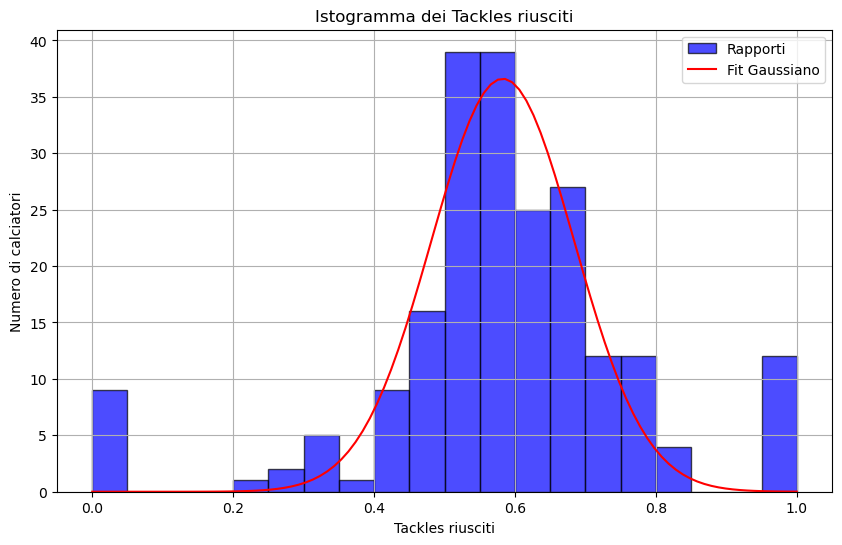

La media risulta: 0.5795166058025643


In [83]:
from scipy.optimize import curve_fit


# Estrai i valori della nona e ottava colonna (indice 8 e 7)
valore_nona_colonna = data['TklW']
valore_ottava_colonna = data['Tkl']

# Calcola il rapporto per ogni calciatore
rapporti = valore_nona_colonna / valore_ottava_colonna

# Filtra i valori non finiti (inf, -inf) e rimuovi NaN
rapporti = rapporti.replace([np.inf, -np.inf], np.nan).dropna()

# Crea un istogramma dei rapporti
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(rapporti, bins=20, alpha=0.7, color='blue', edgecolor='black', label='Rapporti')

# Funzione di fit (es. Gaussiana)
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Calcola il centro dei bins per il fit
bin_centers = (bins[:-1] + bins[1:]) / 2

# Fit dei dati con la funzione gaussiana
popt, _ = curve_fit(gauss, bin_centers, counts)

# Sovrapposizione del fit sull'istogramma
x_fit = np.linspace(bins[0], bins[-1], 100)
y_fit = gauss(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', label='Fit Gaussiano')

# Personalizzazione del grafico
plt.xlabel('Tackles riusciti')
plt.ylabel('Numero di calciatori')
plt.title('Istogramma dei Tackles riusciti')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()

media_valori = rapporti.mean()

# Mostra il risultato
print("La media risulta:", media_valori)

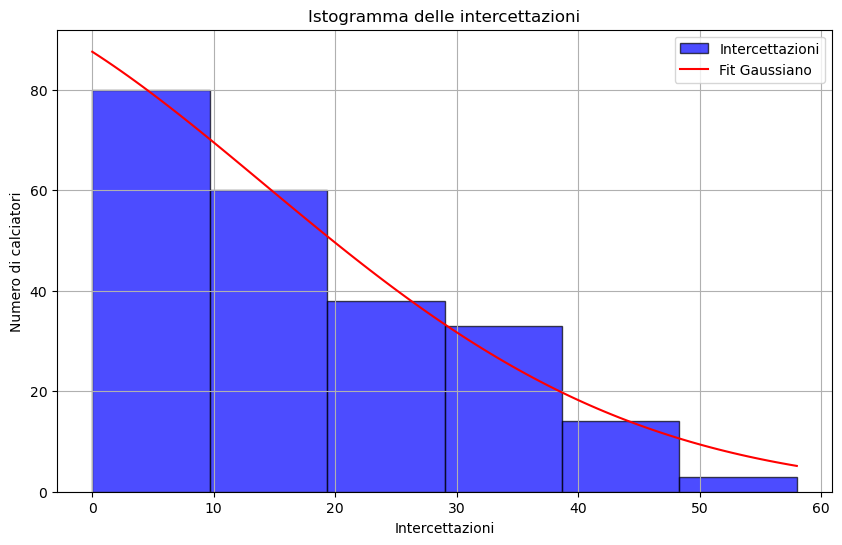

La media risulta: 17.19736842105263


In [84]:
# Calcola il rapporto per ogni calciatore
rapporti = data['Blocks']

# Filtra i valori non finiti (inf, -inf) e rimuovi NaN
rapporti = rapporti.replace([np.inf, -np.inf], np.nan).dropna()

# Crea un istogramma dei rapporti
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(rapporti, bins=6, alpha=0.7, color='blue', edgecolor='black', label='Intercettazioni')

# Funzione di fit (es. Gaussiana)
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Calcola il centro dei bins per il fit
bin_centers = (bins[:-1] + bins[1:]) / 2

# Fit dei dati con la funzione gaussiana
popt, _ = curve_fit(gauss, bin_centers, counts)

# Sovrapposizione del fit sull'istogramma
x_fit = np.linspace(bins[0], bins[-1], 100)
y_fit = gauss(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', label='Fit Gaussiano')

# Personalizzazione del grafico
plt.xlabel('Intercettazioni')
plt.ylabel('Numero di calciatori')
plt.title('Istogramma delle intercettazioni')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()

media_valori = rapporti.mean()

# Mostra il risultato
print("La media risulta:", media_valori)

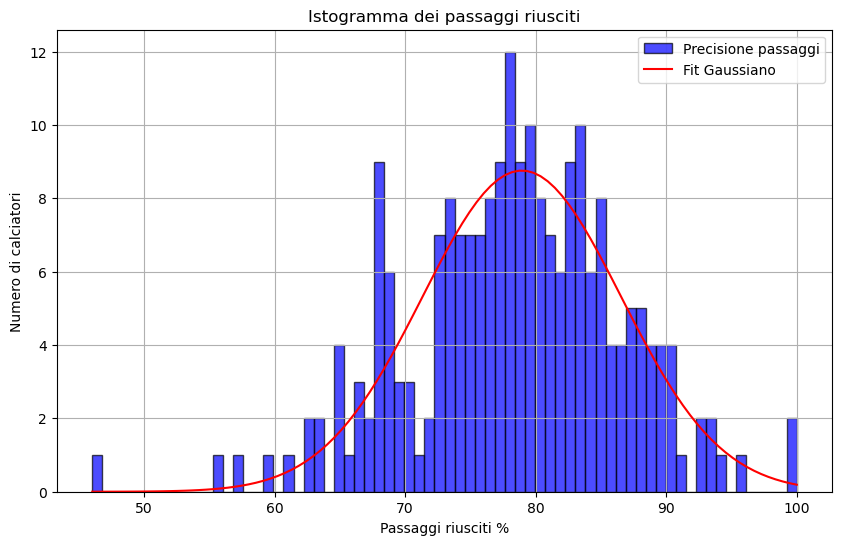

La media risulta: 78.30515151515152


In [145]:
rapporti = (data['short Cmp%'] + data['medium Cmp%'] + data['long Cmp%'])/3

# Filtra i valori non finiti (inf, -inf) e rimuovi NaN
rapporti = rapporti.replace([np.inf, -np.inf], np.nan).dropna()

# Crea un istogramma dei rapporti
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(rapporti, bins=70, alpha=0.7, color='blue', edgecolor='black', label='Precisione passaggi')

# Funzione di fit (es. Gaussiana)
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Calcola il centro dei bins per il fit
bin_centers = (bins[:-1] + bins[1:]) / 2

# Fit dei dati con la funzione gaussiana
popt, _ = curve_fit(gauss, bin_centers, counts, p0=[1, rapporti.mean(), rapporti.std()])


# Sovrapposizione del fit sull'istogramma
x_fit = np.linspace(bins[0], bins[-1], 100)
y_fit = gauss(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', label='Fit Gaussiano')

# Personalizzazione del grafico
plt.xlabel('Passaggi riusciti %')
plt.ylabel('Numero di calciatori')
plt.title('Istogramma dei passaggi riusciti')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()

media_valori = rapporti.mean()

# Mostra il risultato
print("La media risulta:", media_valori)

Parametri ottimali del fit: [2.22438006e+02 4.67238501e-01 2.02899765e-01]


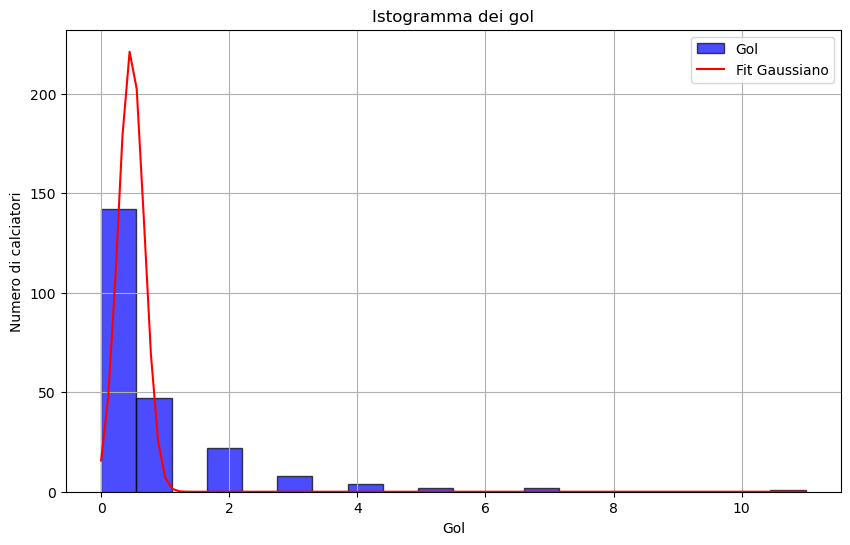

La media risulta: 0.7280701754385965


In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Supponendo che "data" sia già un DataFrame pandas
presenze = data['MP']
gol = data['Gls']

# Filtra i valori non finiti (inf, -inf) e rimuovi NaN
gol = gol.replace([np.inf, -np.inf], np.nan).dropna()

# Crea un istogramma dei rapporti
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(gol, bins=20, alpha=0.7, color='blue', edgecolor='black', label='Gol')

# Funzione di fit (es. Gaussiana)
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

# Calcola il centro dei bins per il fit
bin_centers = (bins[:-1] + bins[1:]) / 2

# Parametri iniziali per il fit gaussiano: ampiezza stimata da max(counts), media e deviazione standard
p0 = [max(counts), gol.mean(), gol.std()]

# Fit dei dati con la funzione gaussiana
try:
    popt, _ = curve_fit(gauss, bin_centers, counts, p0=p0, maxfev=2000)
    print("Parametri ottimali del fit:", popt)  # Stampa i parametri ottimali del fit
except RuntimeError as e:
    print(f"Errore durante il fitting: {e}")
else:
    # Sovrapposizione del fit sull'istogramma solo se il fit ha successo
    x_fit = np.linspace(bins[0], bins[-1], 100)
    y_fit = gauss(x_fit, *popt)
    plt.plot(x_fit, y_fit, color='red', label='Fit Gaussiano')

# Personalizzazione del grafico
plt.xlabel('Gol')
plt.ylabel('Numero di calciatori')
plt.title('Istogramma dei gol')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()

media_valori = gol.mean()
print("La media risulta:", media_valori)


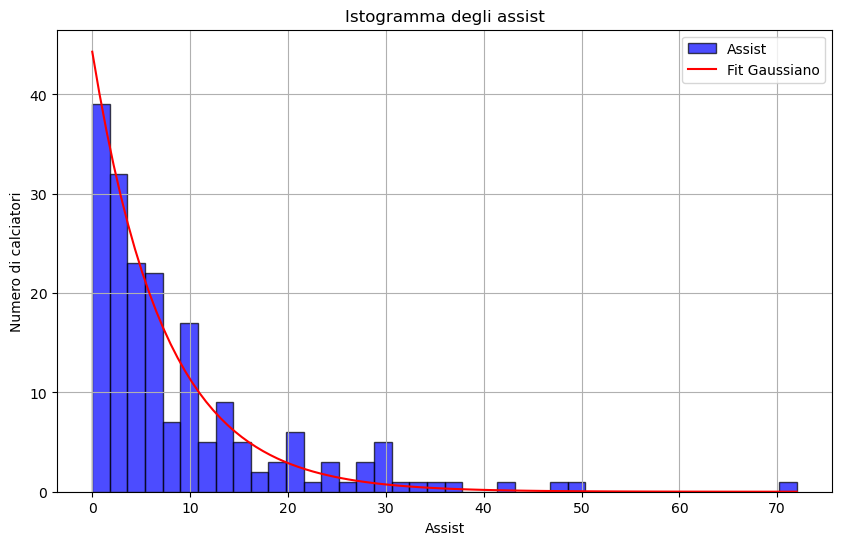

La media risulta: 1.068062827225131


In [147]:
presenze = data['MP']
ast = data['Ast']

# Filtra i valori non finiti (inf, -inf) e rimuovi NaN
ast = ast.replace([np.inf, -np.inf], np.nan).dropna()

# Filtra i dati dove 'MP' è maggiore o uguale a 5
filtrati = data[presenze >= 5]

# Seleziona la colonna 'KP' direttamente
ast = filtrati['Ast']
# Definizione della funzione gaussiana
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Crea l'istogramma
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(kp, bins=40, alpha=0.7, color='blue', edgecolor='black', label='Assist')

# Calcola il centro dei bins
bin_centers = (bins[:-1] + bins[1:]) / 2

# Aggiungi parametri iniziali per il fitting
p0 = [max(counts), bin_centers[np.argmax(counts)], np.std(ast)]

# Fit dei dati con la funzione gaussiana
try:
    popt, _ = curve_fit(gauss, bin_centers, counts, p0=p0, maxfev=1000000)

    x_fit = np.linspace(bins[0], bins[-1], 100)
    y_fit = gauss(x_fit, *popt)
    plt.plot(x_fit, y_fit, color='red', label='Fit Gaussiano')
except RuntimeError as e:
    print("Errore nel fitting: ", e)

# Personalizzazione del grafico
plt.xlabel('Assist')
plt.ylabel('Numero di calciatori')
plt.title('Istogramma degli assist')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()

# Calcola e mostra la media dei valori
media_valori = ast.mean()
print("La media risulta:", media_valori)


C:\Users\milan\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


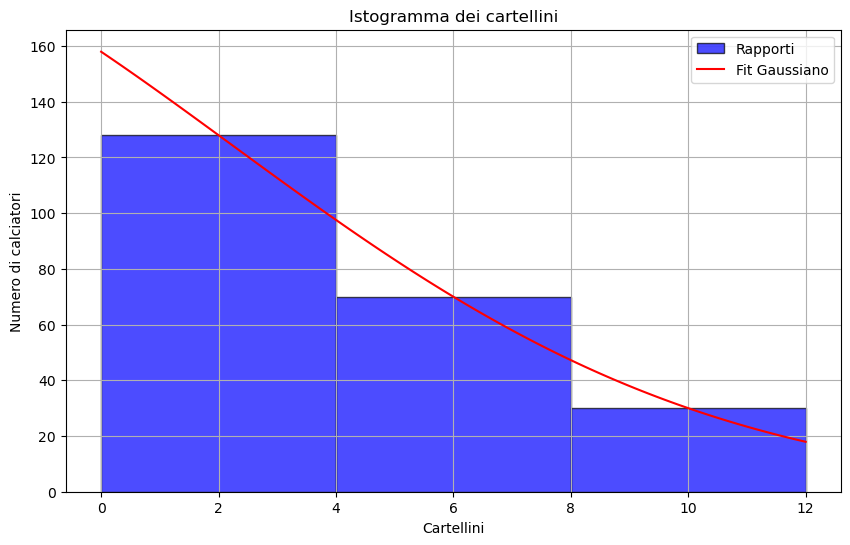

La media risulta: 3.456140350877193


In [125]:
cart = data['CrdY'] + data['CrdR']
# Filtra i valori non finiti (inf, -inf) e rimuovi NaN
cart = cart.replace([np.inf, -np.inf], np.nan).dropna()
# Crea un istogramma dei rapporti
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(cart, bins=3, alpha=0.7, color='blue', edgecolor='black', label='Rapporti')

# Funzione di fit (es. Gaussiana)
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Calcola il centro dei bins per il fit
bin_centers = (bins[:-1] + bins[1:]) / 2

# Fit dei dati con la funzione gaussiana
popt, _ = curve_fit(gauss, bin_centers, counts)

# Sovrapposizione del fit sull'istogramma
x_fit = np.linspace(bins[0], bins[-1], 100)
y_fit = gauss(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', label='Fit Gaussiano')

# Personalizzazione del grafico
plt.xlabel('Cartellini')
plt.ylabel('Numero di calciatori')
plt.title('Istogramma dei cartellini')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()

media_valori = cart.mean()

# Mostra il risultato
print("La media risulta:", media_valori)

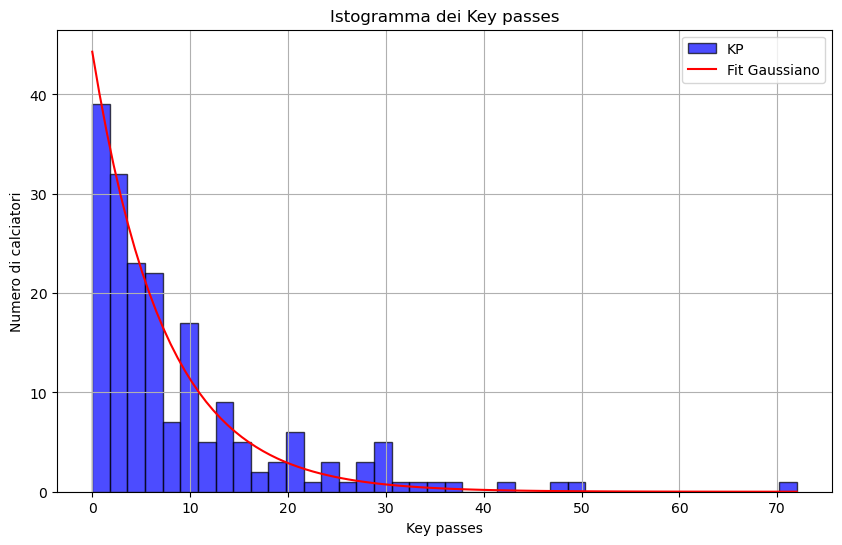

La media risulta: 9.031413612565444


In [141]:
presenze = data['MP']
kp = data['KP']

# Filtra i valori non finiti (inf, -inf) e rimuovi NaN
kp = kp.replace([np.inf, -np.inf], np.nan).dropna()

# Filtra i dati dove 'MP' è maggiore o uguale a 5
filtrati = data[presenze >= 5]

# Seleziona la colonna 'KP' direttamente
kp = filtrati['KP']
# Definizione della funzione gaussiana
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Crea l'istogramma
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(kp, bins=40, alpha=0.7, color='blue', edgecolor='black', label='KP')

# Calcola il centro dei bins
bin_centers = (bins[:-1] + bins[1:]) / 2

# Aggiungi parametri iniziali per il fitting
p0 = [max(counts), bin_centers[np.argmax(counts)], np.std(kp)]

# Fit dei dati con la funzione gaussiana
try:
    popt, _ = curve_fit(gauss, bin_centers, counts, p0=p0, maxfev=1000000)

    x_fit = np.linspace(bins[0], bins[-1], 100)
    y_fit = gauss(x_fit, *popt)
    plt.plot(x_fit, y_fit, color='red', label='Fit Gaussiano')
except RuntimeError as e:
    print("Errore nel fitting: ", e)

# Personalizzazione del grafico
plt.xlabel('Key passes')
plt.ylabel('Numero di calciatori')
plt.title('Istogramma dei Key passes')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()

# Calcola e mostra la media dei valori
media_valori = kp.mean()
print("La media risulta:", media_valori)


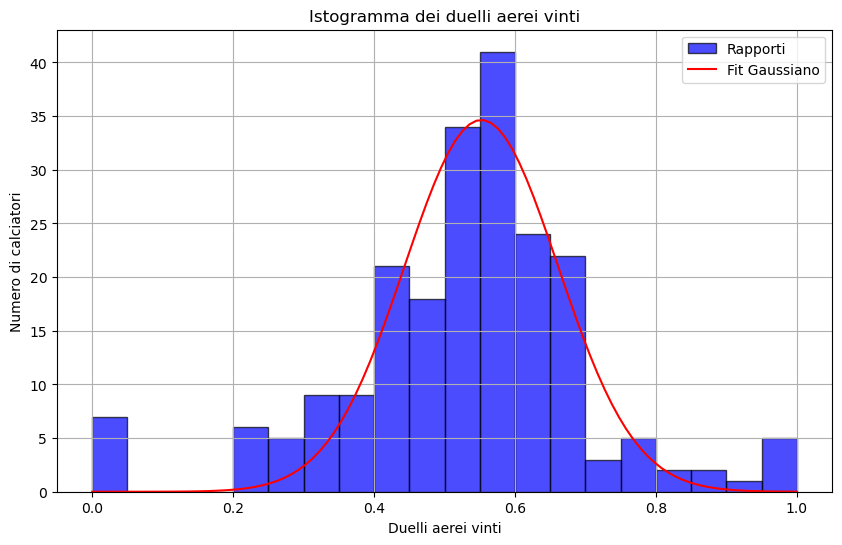

La media risulta: 0.5257924988573672


In [143]:

Aerw = data['AerWon']
Aertot = data['AerTot']  

# Calcola il rapporto per ogni calciatore
rapporti = Aerw / Aertot

# Filtra i valori non finiti (inf, -inf) e rimuovi NaN
rapporti = rapporti.replace([np.inf, -np.inf], np.nan).dropna()

# Crea un istogramma dei rapporti
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(rapporti, bins=20, alpha=0.7, color='blue', edgecolor='black', label='Rapporti')

# Funzione di fit (es. Gaussiana)
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Calcola il centro dei bins per il fit
bin_centers = (bins[:-1] + bins[1:]) / 2

# Fit dei dati con la funzione gaussiana
popt, _ = curve_fit(gauss, bin_centers, counts)

# Sovrapposizione del fit sull'istogramma
x_fit = np.linspace(bins[0], bins[-1], 100)
y_fit = gauss(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', label='Fit Gaussiano')

# Personalizzazione del grafico
plt.xlabel('Duelli aerei vinti')
plt.ylabel('Numero di calciatori')
plt.title('Istogramma dei duelli aerei vinti')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()

# Calcola e mostra la media dei valori
media_valori = rapporti.mean()
print("La media risulta:", media_valori)
